In [1]:
#import cbm_pack.cbm_pack as cbm_pack
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import colorConverter
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d import Axes3D
import os
import sys
import cbm_pack.cbm_pack as cbm_pack

from matplotlib import rcParams


rcParams['figure.figsize'] = (8, 8)

In [2]:
extensions = {
    "mf_raster" : ".mfr",
    "gr_raster" : ".bin",
    "go_raster" : ".gor",
    "pc_raster" : ".pcr",
    "bc_raster" : ".bcr",
    "sc_raster" : ".scr",
    "nc_raster" : ".ncr",
    "io_raster" : ".ior",
    "mf_psth" : ".mfp", 
    "gr_psth" : ".grp",
    "go_psth" : ".gop",
    "pc_psth" : ".pcp",
    "bc_psth" : ".bcp",
    "sc_psth" : ".scp",
    "nc_psth" : ".ncp",
    "io_psth" : ".iop",
    "pfpc_weights" : ".pfpcw",
    "mfnc_weights" : ".mfncw"
}

cell_nums = {
    "mf" : 4096,
    "gr" : 2 ** 20,
    "go" : 4096,
    "pc" : 32,
    "bc" : 128,
    "sc" : 512,
    "nc" : 8,
    "io" : 4
}

In [4]:
def get_post_walk_probes(POST_WALK_PATH):
    # os.chdir(POST_WALK_PATH)
    tot_post_walk_files = os.listdir(POST_WALK_PATH)
    post_walk_file_names = []
    for post_walk_file in tot_post_walk_files:
        if post_walk_file.split('_')[0] == 'post':
            post_walk_file_names.append(post_walk_file)

    #print(post_walk_file_names)


    return sorted(post_walk_file_names, key=lambda x:int(x.split('_')[4]))

In [5]:
def get_walk_weights(WALK_PATH):
    return os.listdir(WALK_PATH)

def plot_walked_weights(WALK_PATH, walked_weights):
    weights_to_plot = []
    for walked_weight_name in walked_weights:
        
        ts_in_walk = int(walked_weight_name.split('.')[0].split('_')[3])
        
        if ts_in_walk == 0 or ts_in_walk == 19999:
            # print("--- PLOTTING", walked_weight_name, "---")
            walked_weight_fn = f'{WALK_PATH}{walked_weight_name}'
            # print(walked_weight_fn)
            walked_weights = np.fromfile(walked_weight_fn, dtype=np.single)
            # print(walked_weights.shape)
            weights_to_plot.append(walked_weights)
            


    nbins = 1000
    print(weights_to_plot[0].shape)
    print(weights_to_plot[1].shape)
    plt.hist(weights_to_plot[1], bins = nbins, alpha=0.6, color='orange')
    plt.hist(weights_to_plot[0], bins = nbins, alpha=0.1, color='blue')
    plt.title('compare 0 and 19999 timestep walk')
    # plt.xlim(0,0.1)
    plt.xlim(0, 1)
    plt.ylim(0, 3000)
    plt.show()
            

         

In [56]:
def compare_weights_over_trials_full(WALK_PATH_POST_ACQ, WALK_PATH_1, WALK_PATH_25, WALK_PATH_50, WALK_PATH_100):

    

    weights_POST_ACQ = np.fromfile(WALK_PATH_POST_ACQ, dtype=np.single)
    weights_walked_1 = np.fromfile(WALK_PATH_1, dtype=np.single)
    weights_walked_25 = np.fromfile(WALK_PATH_25, dtype=np.single)
    weights_walked_50 = np.fromfile(WALK_PATH_50, dtype=np.single)
    weights_walked_100 = np.fromfile(WALK_PATH_100, dtype=np.single)


    
    print(np.allclose(weights_walked_1, weights_walked_25))
    print(np.allclose(weights_walked_25, weights_walked_50))
    print(np.allclose(weights_walked_50, weights_walked_100))
    print(np.allclose(weights_walked_100, weights_walked_1))


    nbins = 1000

    ax1 = plt.subplot(411)
    ax1.hist(weights_POST_ACQ, bins = nbins, alpha=0.5, color='blue')
    ax1.hist(weights_walked_1, bins = nbins, alpha=0.5, color='orange')
    ax1.title.set_text('Trial 500')

    ax2 = plt.subplot(412, sharex=ax1, sharey=ax1)
    ax2.hist(weights_POST_ACQ, bins = nbins, alpha=0.5, color='blue')
    ax2.hist(weights_walked_25, bins = nbins, alpha=0.5, color='orange')
    ax2.title.set_text('Trial 5000')

    ax3 = plt.subplot(413, sharex=ax1, sharey=ax1)
    ax3.hist(weights_POST_ACQ, bins = nbins, alpha=0.5, color='blue')
    ax3.hist(weights_walked_50, bins = nbins, alpha=0.5, color='orange')
    ax3.title.set_text('Trial 12500')

    ax4 = plt.subplot(414, sharex=ax1, sharey=ax1)
    ax4.hist(weights_POST_ACQ, bins = nbins, alpha=0.5, color='blue')
    ax4.hist(weights_walked_100, bins = nbins, alpha=0.5, color='orange')
    ax4.title.set_text('Trial 19500')


    # plt.xlim(0,0.2)
    plt.xlim(0, 1)
    plt.ylim(0, 3000)
    plt.show()


In [4]:
title = 'Compare Weight Distribution of Trial 500, 5000, 12500, 19500 In Walk With Mask'

FORGET_PATH_POST_ACQ = f'../../data/outputs/acq_ISI_500/acq_ISI_500_TRIAL_749.pfpcw'

WALK_PATH_1 = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_500/walked_weights_full_forgetting_500_500.pfpcw'

WALK_PATH_25 = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_500/walked_weights_full_forgetting_500_5000.pfpcw'

WALK_PATH_50 = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_500/walked_weights_full_forgetting_500_12500.pfpcw'

WALK_PATH_100 = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_500/walked_weights_full_forgetting_500_19500.pfpcw'

compare_weights_over_trials_full(FORGET_PATH_POST_ACQ, WALK_PATH_1, WALK_PATH_25, WALK_PATH_50, WALK_PATH_100)

title = 'Compare Weight Distribution of Trial 500, 5000, 12500, 19500 In Sim'

FORGET_PATH_POST_ACQ = f'../../data/outputs/acq_ISI_500/acq_ISI_500_TRIAL_749.pfpcw'

WALK_PATH_1 = f'../../data/outputs/forgetting_bugaloo/forget_weight_test_ISI_500_20K_trial/forget_weight_test_ISI_500_20K_trial_TRIAL_500.pfpcw'

WALK_PATH_25 = f'../../data/outputs/forgetting_bugaloo/forget_weight_test_ISI_500_20K_trial/forget_weight_test_ISI_500_20K_trial_TRIAL_5000.pfpcw'

WALK_PATH_50 = f'../../data/outputs/forgetting_bugaloo/forget_weight_test_ISI_500_20K_trial/forget_weight_test_ISI_500_20K_trial_TRIAL_12500.pfpcw'

WALK_PATH_100 = f'../../data/outputs/forgetting_bugaloo/forget_weight_test_ISI_500_20K_trial/forget_weight_test_ISI_500_20K_trial_TRIAL_19500.pfpcw'

compare_weights_over_trials_full(FORGET_PATH_POST_ACQ, WALK_PATH_1, WALK_PATH_25, WALK_PATH_50, WALK_PATH_100)


title = 'Compare Weight Distribution of Trial 500, 5000, 12500, 19500 In Walk No Mask'

FORGET_PATH_POST_ACQ = f'../../data/outputs/acq_ISI_500/acq_ISI_500_TRIAL_749.pfpcw'

WALK_PATH_1_NO_MASK = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_no_mask_500/walked_weights_full_forgetting_no_mask_500_500.pfpcw'

WALK_PATH_25_NO_MASK = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_no_mask_500/walked_weights_full_forgetting_no_mask_500_5000.pfpcw'

WALK_PATH_50_NO_MASK = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_no_mask_500/walked_weights_full_forgetting_no_mask_500_12500.pfpcw'

WALK_PATH_100_NO_MASK = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_no_mask_500/walked_weights_full_forgetting_no_mask_500_19500.pfpcw'

compare_weights_over_trials_full(FORGET_PATH_POST_ACQ, WALK_PATH_1_NO_MASK, WALK_PATH_25_NO_MASK, WALK_PATH_50_NO_MASK, WALK_PATH_100_NO_MASK)



NameError: name 'compare_weights_over_trials_full' is not defined

False
False
False
False


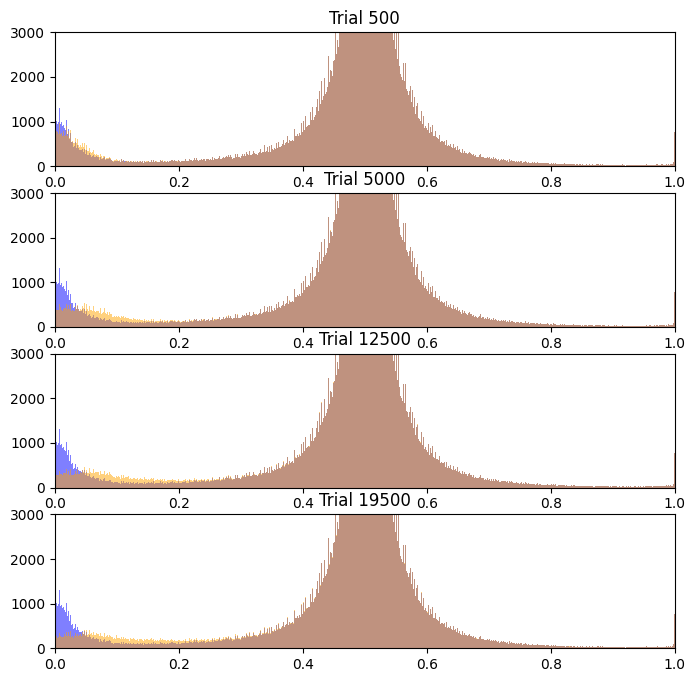

False
False
False
False


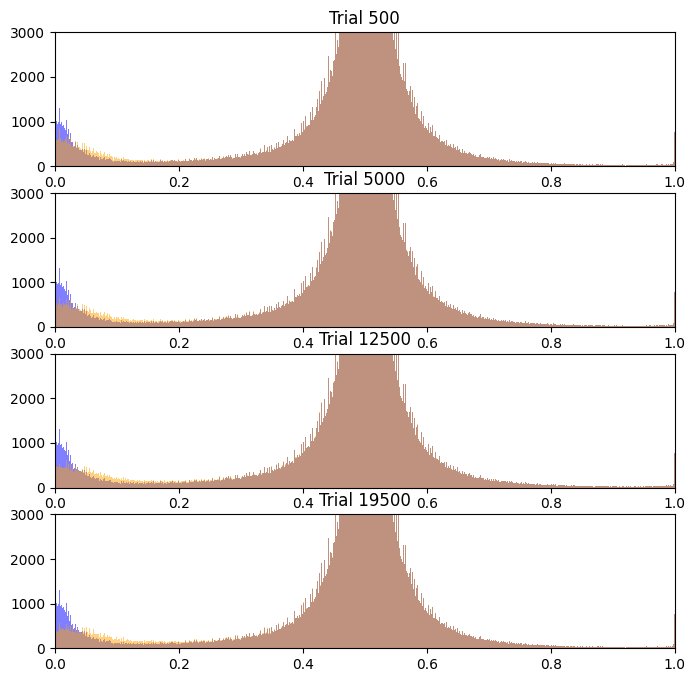

In [8]:
title = 'Compare Weight Distribution of Trial 500, 5000, 12500, 19500 In Walk With Mask'

FORGET_PATH_POST_ACQ = f'../../data/outputs/acq_ISI_500/acq_ISI_500_TRIAL_749.pfpcw'

WALK_PATH_1 = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_500/walked_weights_full_forgetting_500_500.pfpcw'

WALK_PATH_25 = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_500/walked_weights_full_forgetting_500_5000.pfpcw'

WALK_PATH_50 = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_500/walked_weights_full_forgetting_500_12500.pfpcw'

WALK_PATH_100 = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_500/walked_weights_full_forgetting_500_19500.pfpcw'

compare_weights_over_trials_full(FORGET_PATH_POST_ACQ, WALK_PATH_1, WALK_PATH_25, WALK_PATH_50, WALK_PATH_100)


title = 'Compare Weight Distribution of Trial 500, 5000, 12500, 19500 In Walk Blocks'

FORGET_PATH_POST_ACQ = f'../../data/outputs/acq_ISI_500/acq_ISI_500_TRIAL_749.pfpcw'

WALK_PATH_1_BLOCKS = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_via_blocks_500/walked_weights_full_forgetting_via_blocks_500_1.pfpcw'

WALK_PATH_25_BLOCKS = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_via_blocks_500/walked_weights_full_forgetting_via_blocks_500_2.pfpcw'

WALK_PATH_50_BLOCKS = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_via_blocks_500/walked_weights_full_forgetting_via_blocks_500_3.pfpcw'

WALK_PATH_100_BLOCKS = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_via_blocks_500/walked_weights_full_forgetting_via_blocks_500_4.pfpcw'

compare_weights_over_trials_full(FORGET_PATH_POST_ACQ, WALK_PATH_1_BLOCKS, WALK_PATH_25_BLOCKS, WALK_PATH_50_BLOCKS, WALK_PATH_100_BLOCKS)



In [9]:
title = 'Compare Weight Distribution of Trial 500, 5000, 12500, 19500 In Walk Blocks Maskless'

FORGET_PATH_POST_ACQ = f'../../data/outputs/acq_ISI_500/acq_ISI_500_TRIAL_749.pfpcw'

WALK_PATH_1_BLOCKS_NO_MASK = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_via_blocks_maskless_500/walked_weights_full_forgetting_via_blocks_maskless_500_1.pfpcw'

WALK_PATH_25_BLOCKS_NO_MASK = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_via_blocks_maskless_500/walked_weights_full_forgetting_via_blocks_maskless_500_2.pfpcw'

WALK_PATH_50_BLOCKS_NO_MASK = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_via_blocks_maskless_500/walked_weights_full_forgetting_via_blocks_maskless_500_3.pfpcw'

WALK_PATH_100_BLOCKS_NO_MASK = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_via_blocks_maskless_500/walked_weights_full_forgetting_via_blocks_maskless_500_4.pfpcw'

compare_weights_over_trials_full(FORGET_PATH_POST_ACQ, WALK_PATH_1_BLOCKS_NO_MASK, WALK_PATH_25_BLOCKS_NO_MASK, WALK_PATH_50_BLOCKS_NO_MASK, WALK_PATH_100_BLOCKS_NO_MASK)


title = 'Compare Weight Distribution of Trial 500, 5000, 12500, 19500 In Walk No Mask'

FORGET_PATH_POST_ACQ = f'../../data/outputs/acq_ISI_500/acq_ISI_500_TRIAL_749.pfpcw'

WALK_PATH_1_NO_MASK = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_no_mask_500/walked_weights_full_forgetting_no_mask_500_500.pfpcw'

WALK_PATH_25_NO_MASK = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_no_mask_500/walked_weights_full_forgetting_no_mask_500_5000.pfpcw'

WALK_PATH_50_NO_MASK = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_no_mask_500/walked_weights_full_forgetting_no_mask_500_12500.pfpcw'

WALK_PATH_100_NO_MASK = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_no_mask_500/walked_weights_full_forgetting_no_mask_500_19500.pfpcw'

compare_weights_over_trials_full(FORGET_PATH_POST_ACQ, WALK_PATH_1_NO_MASK, WALK_PATH_25_NO_MASK, WALK_PATH_50_NO_MASK, WALK_PATH_100_NO_MASK)




False
False
False
False


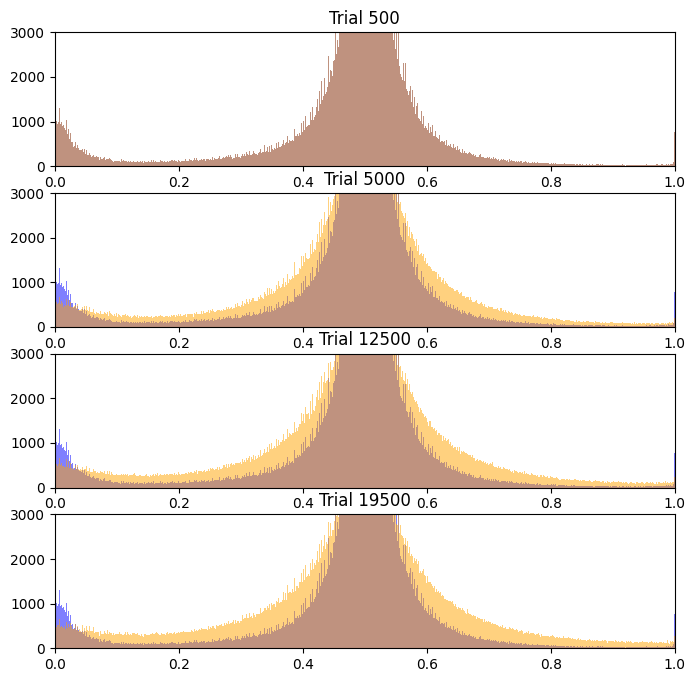

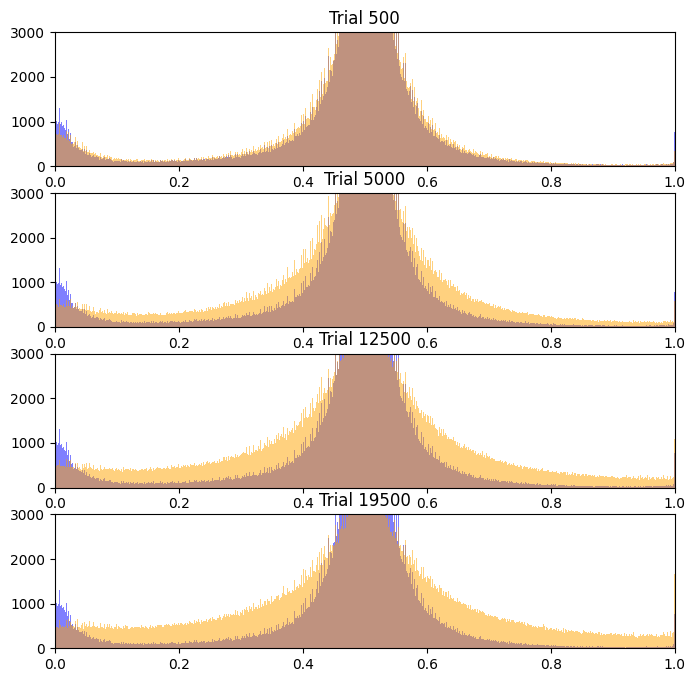

In [ ]:
title = 'Compare Weight Distribution of Trial 500, 5000, 12500, 19500 In Walk Blocks Maskless'

FORGET_PATH_POST_ACQ = f'../../data/outputs/acq_ISI_500/acq_ISI_500_TRIAL_749.pfpcw'

WALK_PATH_1_BLOCKS_NO_MASK = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_via_blocks_maskless_500/walked_weights_full_forgetting_via_blocks_maskless_500_0.pfpcw'

WALK_PATH_25_BLOCKS_NO_MASK = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_via_blocks_maskless_500/walked_weights_full_forgetting_via_blocks_maskless_500_2.pfpcw'

WALK_PATH_50_BLOCKS_NO_MASK = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_via_blocks_maskless_500/walked_weights_full_forgetting_via_blocks_maskless_500_3.pfpcw'

WALK_PATH_100_BLOCKS_NO_MASK = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_via_blocks_maskless_500/walked_weights_full_forgetting_via_blocks_maskless_500_4.pfpcw'

compare_weights_over_trials_full(FORGET_PATH_POST_ACQ, WALK_PATH_1_BLOCKS_NO_MASK, WALK_PATH_25_BLOCKS_NO_MASK, WALK_PATH_50_BLOCKS_NO_MASK, WALK_PATH_100_BLOCKS_NO_MASK)


title = 'Compare Weight Distribution of Trial 500, 5000, 12500, 19500 In Sim'

FORGET_PATH_POST_ACQ = f'../../data/outputs/acq_ISI_500/acq_ISI_500_TRIAL_749.pfpcw'

WALK_PATH_1 = f'../../data/outputs/forgetting_bugaloo/forget_weight_test_ISI_500_20K_trial/forget_weight_test_ISI_500_20K_trial_TRIAL_500.pfpcw'

WALK_PATH_25 = f'../../data/outputs/forgetting_bugaloo/forget_weight_test_ISI_500_20K_trial/forget_weight_test_ISI_500_20K_trial_TRIAL_5000.pfpcw'

WALK_PATH_50 = f'../../data/outputs/forgetting_bugaloo/forget_weight_test_ISI_500_20K_trial/forget_weight_test_ISI_500_20K_trial_TRIAL_12500.pfpcw'

WALK_PATH_100 = f'../../data/outputs/forgetting_bugaloo/forget_weight_test_ISI_500_20K_trial/forget_weight_test_ISI_500_20K_trial_TRIAL_19500.pfpcw'

compare_weights_over_trials_full(FORGET_PATH_POST_ACQ, WALK_PATH_1, WALK_PATH_25, WALK_PATH_50, WALK_PATH_100)

[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]


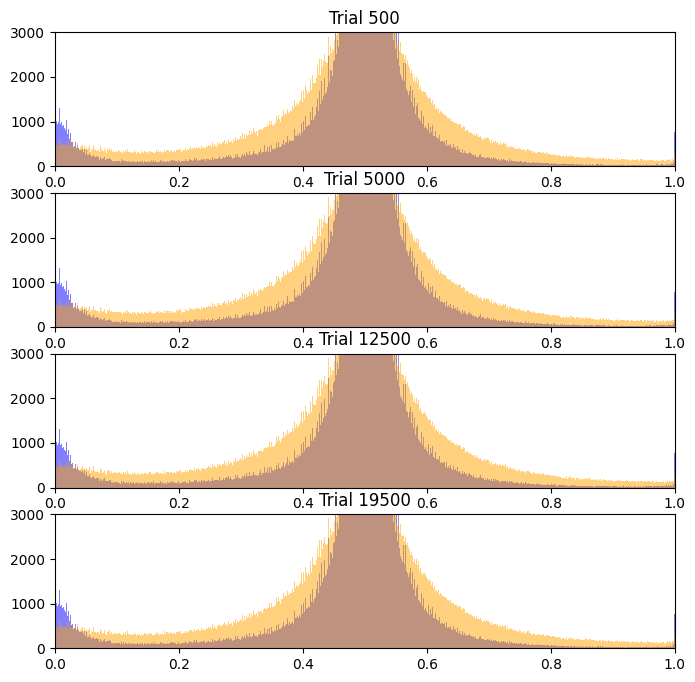

[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]


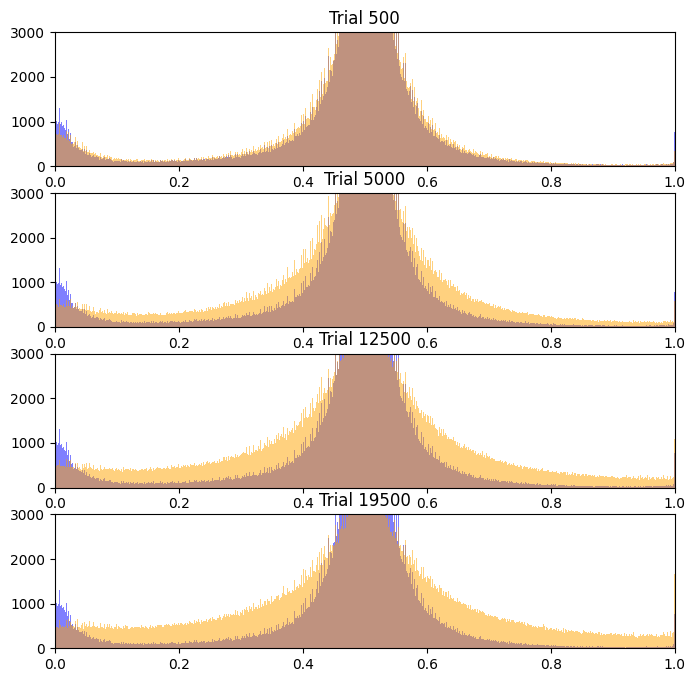

In [ ]:
title = 'Compare Weight Distribution of Trial 500, 5000, 12500, 19500 In Walk Blocks Maskless 20k'

FORGET_PATH_POST_ACQ = f'../../data/outputs/acq_ISI_500/acq_ISI_500_TRIAL_749.pfpcw'

WALK_PATH_1_BLOCKS_NO_MASK_20K = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_via_blocks_maskless_20k_500/walked_weights_full_forgetting_via_blocks_maskless_20k_500_1.pfpcw'

WALK_PATH_25_BLOCKS_NO_MASK_20K = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_via_blocks_maskless_20k_500/walked_weights_full_forgetting_via_blocks_maskless_20k_500_2.pfpcw'

WALK_PATH_50_BLOCKS_NO_MASK_20K = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_via_blocks_maskless_20k_500/walked_weights_full_forgetting_via_blocks_maskless_20k_500_3.pfpcw'

WALK_PATH_100_BLOCKS_NO_MASK_20K = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_via_blocks_maskless_20k_500/walked_weights_full_forgetting_via_blocks_maskless_20k_500_4.pfpcw'

compare_weights_over_trials_full(FORGET_PATH_POST_ACQ, WALK_PATH_1_BLOCKS_NO_MASK_20K, WALK_PATH_25_BLOCKS_NO_MASK_20K, WALK_PATH_50_BLOCKS_NO_MASK_20K, WALK_PATH_100_BLOCKS_NO_MASK_20K)

title = 'Compare Weight Distribution of Trial 500, 5000, 12500, 19500 In Sim'

FORGET_PATH_POST_ACQ = f'../../data/outputs/acq_ISI_500/acq_ISI_500_TRIAL_749.pfpcw'

WALK_PATH_1 = f'../../data/outputs/forgetting_bugaloo/forget_weight_test_ISI_500_20K_trial/forget_weight_test_ISI_500_20K_trial_TRIAL_500.pfpcw'

WALK_PATH_25 = f'../../data/outputs/forgetting_bugaloo/forget_weight_test_ISI_500_20K_trial/forget_weight_test_ISI_500_20K_trial_TRIAL_5000.pfpcw'

WALK_PATH_50 = f'../../data/outputs/forgetting_bugaloo/forget_weight_test_ISI_500_20K_trial/forget_weight_test_ISI_500_20K_trial_TRIAL_12500.pfpcw'

WALK_PATH_100 = f'../../data/outputs/forgetting_bugaloo/forget_weight_test_ISI_500_20K_trial/forget_weight_test_ISI_500_20K_trial_TRIAL_19500.pfpcw'

compare_weights_over_trials_full(FORGET_PATH_POST_ACQ, WALK_PATH_1, WALK_PATH_25, WALK_PATH_50, WALK_PATH_100)


False
False
False
False


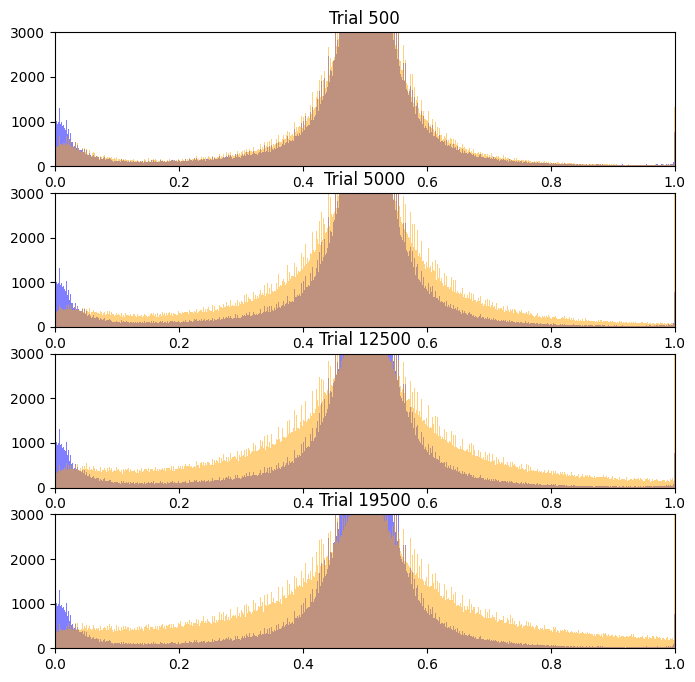

False
False
False
False


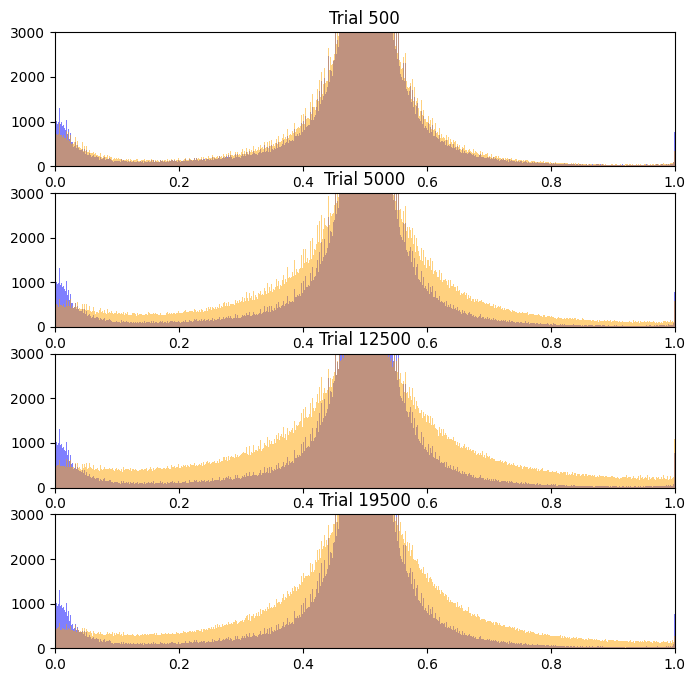

In [57]:
title = 'Compare Weight Distribution of Trial 500, 5000, 12500, 19500 In Walk With Mask'

FORGET_PATH_POST_ACQ = f'../../data/outputs/acq_ISI_500/acq_ISI_500_TRIAL_749.pfpcw'

WALK_PATH_1 = f'../../data/outputs/forgetting_bugaloo/walked_weights_test_plast_500/walked_weights_test_plast_500_500.pfpcw'

WALK_PATH_25 = f'../../data/outputs/forgetting_bugaloo/walked_weights_test_plast_500/walked_weights_test_plast_500_5000.pfpcw'

WALK_PATH_50 = f'../../data/outputs/forgetting_bugaloo/walked_weights_test_plast_500/walked_weights_test_plast_500_12500.pfpcw'

WALK_PATH_100 = f'../../data/outputs/forgetting_bugaloo/walked_weights_test_plast_500/walked_weights_test_plast_500_19500.pfpcw'

compare_weights_over_trials_full(FORGET_PATH_POST_ACQ, WALK_PATH_1, WALK_PATH_25, WALK_PATH_50, WALK_PATH_100)

title = 'Compare Weight Distribution of Trial 500, 5000, 12500, 19500 In Sim'

FORGET_PATH_POST_ACQ = f'../../data/outputs/acq_ISI_500/acq_ISI_500_TRIAL_749.pfpcw'

WALK_PATH_1 = f'../../data/outputs/forgetting_bugaloo/forget_weight_test_ISI_500_20K_trial/forget_weight_test_ISI_500_20K_trial_TRIAL_500.pfpcw'

WALK_PATH_25 = f'../../data/outputs/forgetting_bugaloo/forget_weight_test_ISI_500_20K_trial/forget_weight_test_ISI_500_20K_trial_TRIAL_5000.pfpcw'

WALK_PATH_50 = f'../../data/outputs/forgetting_bugaloo/forget_weight_test_ISI_500_20K_trial/forget_weight_test_ISI_500_20K_trial_TRIAL_12500.pfpcw'

WALK_PATH_100 = f'../../data/outputs/forgetting_bugaloo/forget_no_coll_no_io_20k_trial/forget_no_coll_no_io_20k_trial_TRIAL_20000.pfpcw'

compare_weights_over_trials_full(FORGET_PATH_POST_ACQ, WALK_PATH_1, WALK_PATH_25, WALK_PATH_50, WALK_PATH_100)




In [15]:
title = 'Compare Weight Distribution of Trial 500, 5000, 12500, 19500 In Walk No Mask'

FORGET_PATH_POST_ACQ = f'../../data/outputs/acq_ISI_500/acq_ISI_500_TRIAL_749.pfpcw'

WALK_PATH_1_NO_MASK = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_no_mask_500/walked_weights_full_forgetting_no_mask_500_19500.pfpcw' 

WALK_PATH_25_NO_MASK = f'../../data/outputs/forgetting_bugaloo/walked_weights_full_forgetting_no_mask_500/walked_weights_full_forgetting_no_mask_500_5000.pfpcw'


WALK_PATH_50_NO_MASK = f'../../data/outputs/forgetting_bugaloo/walked_weights_test_plast_ninetwo_500/walked_weights_test_plast_ninetwo_500_9.pfpcw'

WALK_PATH_100_NO_MASK = f'../../data/outputs/forgetting_bugaloo/walked_weights_test_plast_500/walked_weights_test_plast_500_9.pfpcw'

compare_weights_over_trials_full(FORGET_PATH_POST_ACQ, WALK_PATH_1_NO_MASK, WALK_PATH_25_NO_MASK, WALK_PATH_50_NO_MASK, WALK_PATH_100_NO_MASK)

False
False
False
False


In [6]:
MAX_CR_AMP = 6
PRE_CS_COLLECT_TS = 400
POST_CS_COLLECT_TS = 400
ISIS = np.array([500])
ISI = 500
NUM_COLLECT_TRIALS = 50 
NUM_COLLECT_TS = PRE_CS_COLLECT_TS + ISI + POST_CS_COLLECT_TS
# INPUT_DIR = "./data/inputs/"
NUM_PROBE_TRIALS = 50



# INPUT_NC_FILE = INPUT_DIR + INPUT_BASE + "/" + INPUT_BASE + extensions["nc_raster"]

In [7]:
def find_reset_weights_for_isi(isis: np.ndarray, input_dir, basename='', mode='trials'):

    for isi in isis:
        #probe_isi_{isi}_reset_43500_bugaloo
        #reset_input_prefix = f"probe_isi_{isi}_reset"
        #reset_sub_dirs = [d for d in os.listdir(INPUT_DIR) \
        #                     if os.path.isdir(os.path.join(INPUT_DIR, d)) \
        #                         and d.startswith(reset_input_prefix)]
        #reset_nums = sorted([int(d.split('_')[-1]) for d in reset_sub_dirs])
        # 15500 is when I get nans, so expect anything greater than that to be 0
        if mode == 'trials':
            reset_nums = [500, 5000, 12500, 19500]
        elif mode == 'blocks':
            reset_nums = [1, 2, 3, 4]
            
        isi_reset_crs = []
        for num in reset_nums:
            #reset_base = f"{reset_input_prefix}_{num}"
            # reset_base = f"post_walk_probe_{isi}_{num}"

            reset_base = f"{basename}_{isi}_{num}"
            reset_pc_file = f"{input_dir}{reset_base}/{reset_base}{extensions['pc_raster']}"

            num_collect_ts = PRE_CS_COLLECT_TS + isi + POST_CS_COLLECT_TS
            pc_rasters = cbm_pack.np_arr_from_file(reset_pc_file, np.uint8)
            pc_rasters = cbm_pack.reshape_raster( \
                    pc_rasters, \
                    cell_nums["pc"], \
                    NUM_PROBE_TRIALS, \
                    num_collect_ts)

            pc_reset_crs = cbm_pack.pcs_to_crs(pc_rasters, PRE_CS_COLLECT_TS, POST_CS_COLLECT_TS, isi)

            computed_cr = np.mean(np.max(pc_reset_crs, axis=1))
            if np.isnan(computed_cr):
                computed_cr = 0.0
            isi_reset_crs.append(computed_cr)
            print(f"ISI {isi}: computed cr for {num} reset: {computed_cr}")
            
    return isi_reset_crs
    
    # final setup stuff


In [31]:
def find_reset_weights_for_isi(isis: np.ndarray, input_dir, basename='', mode='trials'):

    for isi in isis:
        #probe_isi_{isi}_reset_43500_bugaloo
        #reset_input_prefix = f"probe_isi_{isi}_reset"
        #reset_sub_dirs = [d for d in os.listdir(INPUT_DIR) \
        #                     if os.path.isdir(os.path.join(INPUT_DIR, d)) \
        #                         and d.startswith(reset_input_prefix)]
        #reset_nums = sorted([int(d.split('_')[-1]) for d in reset_sub_dirs])
        # 15500 is when I get nans, so expect anything greater than that to be 0
        if mode == 'trials':
            reset_nums = [500, 5000, 12500, 19500]
        elif mode == 'blocks':
            reset_nums = [1, 2, 3, 4]
        elif mode == 'events':
            reset_nums = [4]
        elif mode == 'poiss_gr':
            reset_nums = [20000]
        elif mode == 'no_io':
            reset_nums = [20000]
            
        isi_reset_crs = []
        for num in reset_nums:
            #reset_base = f"{reset_input_prefix}_{num}"
            # reset_base = f"post_walk_probe_{isi}_{num}"

            reset_base = f"{basename}_{isi}_{num}"
            reset_pc_file = f"{input_dir}{reset_base}/{reset_base}{extensions['pc_raster']}"

            if mode == 'poiss_gr':
                reset_base = basename
                reset_pc_file = f"{input_dir}{reset_base}{extensions['pc_raster']}"

            if mode == 'no_io':
                reset_base = f"{basename}"
                reset_pc_file = f"{input_dir}{reset_base}/{reset_base}{extensions['pc_raster']}"

            num_collect_ts = PRE_CS_COLLECT_TS + isi + POST_CS_COLLECT_TS
            pc_rasters = cbm_pack.np_arr_from_file(reset_pc_file, np.uint8)
            pc_rasters = cbm_pack.reshape_raster( \
                    pc_rasters, \
                    cell_nums["pc"], \
                    NUM_PROBE_TRIALS, \
                    num_collect_ts)

            pc_reset_crs = cbm_pack.pcs_to_crs(pc_rasters, PRE_CS_COLLECT_TS, POST_CS_COLLECT_TS, isi)

            computed_cr = np.mean(np.max(pc_reset_crs, axis=1))
            if np.isnan(computed_cr):
                computed_cr = 0.0
            isi_reset_crs.append(computed_cr)
            print(f"ISI {isi}: computed cr for {num} reset: {computed_cr}")
            
    return isi_reset_crs
    
    # final setup stuff

In [32]:

INPUT_DIR_WALK = f"/home/satvik/lobule_v/CbmSim/data/outputs/post_walk_probes_{ISI}/"

INPUT_DIR_SIM = f"/home/satvik/lobule_v/CbmSim/data/outputs/sim_forgetting_probes_{ISI}/" 

INPUT_DIR_MASKLESS = f"/home/satvik/lobule_v/CbmSim/data/outputs/maskless_forgetting_probes_{ISI}/" 

INPUT_DIR_BLOCKS = f"/home/satvik/lobule_v/CbmSim/data/outputs/blocks_forgetting_probes_{ISI}/"

INPUT_DIR_BLOCKS_MASKLESS = f"/home/satvik/lobule_v/CbmSim/data/outputs/blocks_maskless_forgetting_probes_{ISI}/"

INPUT_DIR_BLOCKS_MASKLESS_20k = f"/home/satvik/lobule_v/CbmSim/data/outputs/blocks_maskless_20k_forgetting_probes_{ISI}/"

INPUT_DIR_TEST_PLAST = f"/home/satvik/lobule_v/CbmSim/data/outputs/test_plast_{ISI}/"

INPUT_DIR_RATIOS_ID = f"/home/satvik/lobule_v/CbmSim/data/outputs/test_plast_ratios_{ISI}/"

INPUT_DIR_POISS_GR = f"/home/satvik/lobule_v/CbmSim/data/outputs/test_poiss_gr_io_thresh_91_5_20000/"

INPUT_DIR_NO_IO = f"/home/satvik/lobule_v/CbmSim/data/outputs/test_no_coll_no_io_20k_trial/"

In [33]:
SIM_BASENAME = 'sim_forgetting_probe'
WALK_BASENAME = 'post_walk_probe'
MASKLESS_BASENAME = 'maskless_forgetting_probe'
BLOCKS_BASENAME = 'blocks_forgetting_probe'
BLOCKS_MASKLESS_BASENAME = 'blocks_maskless_forgetting_probe'
BLOCKS_MASKLESS_20k_BASENAME = 'blocks_maskless_20k_forgetting_probe'
TEST_PLAST_BASENAME = 'test_plast'
RATIOS_ID_BASENAME = 'test_plast_ratios'
POISS_GR_BASENAME = 'test_poiss_gr_io_thresh_91_5_20000'

NO_IO_BASENAME = 'test_no_coll_no_io_20k_trial_20000'


reset_nums = [500, 5000, 12500, 19500]

reset_blocks = [5000, 10000, 15000, 20000]

isi=500


isi_reset_crs_NO_IO = find_reset_weights_for_isi(ISIS, input_dir = INPUT_DIR_NO_IO, basename=NO_IO_BASENAME, mode='no_io')

isi_reset_crs_POISS_GR = find_reset_weights_for_isi(ISIS, input_dir = INPUT_DIR_POISS_GR, basename=POISS_GR_BASENAME, mode='poiss_gr')


isi_reset_crs_RATIOS_ID = find_reset_weights_for_isi(ISIS, input_dir = INPUT_DIR_RATIOS_ID, basename=RATIOS_ID_BASENAME, mode='events')
isi_reset_crs_BLOCKS_MASKLESS_20k = find_reset_weights_for_isi(ISIS, input_dir = INPUT_DIR_BLOCKS_MASKLESS_20k, basename=BLOCKS_MASKLESS_20k_BASENAME, mode='blocks')
isi_reset_crs_BLOCKS_MASKLESS = find_reset_weights_for_isi(ISIS, input_dir = INPUT_DIR_BLOCKS_MASKLESS, basename=BLOCKS_MASKLESS_BASENAME, mode='blocks')
isi_reset_crs_BLOCKS = find_reset_weights_for_isi(ISIS, input_dir = INPUT_DIR_BLOCKS, basename=BLOCKS_BASENAME, mode='blocks')
isi_reset_crs_SIM = find_reset_weights_for_isi(ISIS, input_dir = INPUT_DIR_SIM, basename=SIM_BASENAME, mode='trials')
isi_reset_crs_WALK = find_reset_weights_for_isi(ISIS, input_dir = INPUT_DIR_WALK, basename=WALK_BASENAME, mode='trials')
isi_reset_crs_MASKLESS = find_reset_weights_for_isi(ISIS, input_dir = INPUT_DIR_MASKLESS, basename=MASKLESS_BASENAME, mode='trials')
isi_reset_crs_TEST_PLAST = find_reset_weights_for_isi(ISIS, input_dir = INPUT_DIR_TEST_PLAST, basename=TEST_PLAST_BASENAME, mode='trials')





fig = plt.figure()
fig.suptitle("CR Over Trials", fontsize=14)
fig.patch.set_facecolor('white')
ax = plt.subplot(111)
ax.set_xlabel('Trial Num', fontsize=12)
ax.set_ylabel('eyelid closure (mm)', fontsize=12)

plt.plot(reset_nums, isi_reset_crs_RATIOS_ID, 'o', color='cyan', label=f'WALK OVER P EVENTS FULL ID RATIOS', linestyle='solid', linewidth=2, markersize=3)
plt.plot(reset_nums, isi_reset_crs_TEST_PLAST, 'o', color='black', label=f'WALK OVER LTP LTD EVENTS FULL', linestyle='solid', linewidth=2, markersize=3)
plt.plot(reset_nums, isi_reset_crs_BLOCKS_MASKLESS_20k, 'o', color='brown', label=f'WALK OVER 20K STEPS FULL', linestyle='dashed', linewidth=2, markersize=3)
plt.plot(reset_nums, isi_reset_crs_SIM, 'o', color='green', label=f'SIM FORGETTING', linestyle='solid', linewidth=2, markersize=3)
plt.plot(reset_nums, isi_reset_crs_WALK, 'o', color='red', label=f'WALK OVER TRIAL AVERAGED STEPS 30K SELECT', linestyle='dashed', linewidth=2, markersize=3)
plt.plot(reset_nums, isi_reset_crs_MASKLESS, 'o', color='blue', label=f'WALK OVER TRIAL AVERAGED STEPS FULL', linestyle='dashed', linewidth=2, markersize=3)
plt.plot(reset_blocks, isi_reset_crs_BLOCKS, 'o', color='purple', label=f'WALK OVER STEPS IN 5K TRIAL BLOCKS 30K SELECT', linestyle='dashed', linewidth=2, markersize=3)
plt.plot(reset_blocks, isi_reset_crs_BLOCKS_MASKLESS, 'o', color='orange', label=f'WALK OVER STEPS IN 5K TRIAL BLOCKS FULL', linestyle='dashed', linewidth=2, markersize=3)


ax.legend(loc='center right', bbox_to_anchor=(1.20, 0.5))
plt.ylim((0, MAX_CR_AMP+1))
plt.tight_layout()
plt.show()
plt.close(fig)




FileNotFoundError: [Errno 2] No such file or directory: '/home/satvik/lobule_v/CbmSim/data/outputs/test_no_coll_no_io_20k_trial_20000/test_no_coll_no_io_20k_trial_20000_20000/test_no_coll_no_io_20k_trial_20000_20000.pcr'

In [47]:
def calc_total_ltp_ltd_events(trials_path: str, tot_ltp_events: list, tot_ltd_events: list) -> np.ndarray:

    ltp_events = np.zeros(load_events_file(f'{trials_path}{tot_ltp_events[0]}').shape)
    ltd_events = np.zeros(load_events_file(f'{trials_path}{tot_ltd_events[0]}').shape)

    for i in range(len(tot_ltp_events)):
        ltp_path = f'{trials_path}{tot_ltp_events[i]}'
        ltd_path = f'{trials_path}{tot_ltd_events[i]}'
        ltp_events = ltp_events + load_events_file(ltp_path)
        ltd_events = ltd_events + load_events_file(ltd_path)

    return ltp_events.astype(np.float64), ltd_events.astype(np.float64)


def get_ltp_ltd_files(trials_path):
    print('getting files...')
    ltp_events_files = []
    ltd_events_files = []


    for trial_block in os.listdir(trials_path):
        if trial_block.endswith('LTP.pfpcpe'): ltp_events_files.append(trial_block)
        elif trial_block.endswith('LTD.pfpcpe'): ltd_events_files.append(trial_block)

        
    
    ltp_events_files.sort(key=lambda x: int(x.split('_')[-2]))
    ltd_events_files.sort(key=lambda x: int(x.split('_')[-2]))

    
    print('successfully retrieved files')
    return ltp_events_files, ltd_events_files


def load_events_file(file_path_events):
    return np.fromfile(file_path_events, dtype=np.uint32)


def load_weights_mask(file_path_weights, file_path_mask):
    return np.fromfile(file_path_weights, dtype=np.single), np.fromfile(file_path_mask, dtype=np.ubyte)

In [14]:
ISI = '500'
NUM_RESET = '30000'

weights_path = f'../../data/outputs/acq_ISI_{ISI}/acq_ISI_{ISI}_TRIAL_749.pfpcw'
mask_path = '../../data/outputs/forgetting_bugaloo/freeze_isi_' + ISI + '_bugaloo/freeze_w_delta_isi_' + ISI + '_' + NUM_RESET + '.mask'
trials_path = '../../data/outputs/forgetting_bugaloo/ltp_ltd_plast_events_test/'

weights, mask = load_weights_mask(weights_path, mask_path)

tot_ltp_events, tot_ltd_events = get_ltp_ltd_files(trials_path)

ltp_events, ltd_events = calc_total_ltp_ltd_events(trials_path, tot_ltp_events, tot_ltd_events)

print(ltd_events, ltd_events)



getting files...
successfully retrieved files
[ 866.  705.  395. ...  290. 5446. 6196.] [ 866.  705.  395. ...  290. 5446. 6196.]


In [48]:
trials_path_2 = '../../data/outputs/forgetting_bugaloo/forget_no_coll_no_io_20k_trial/'

tot_ltp_events_2, tot_ltd_events_2 = get_ltp_ltd_files(trials_path_2)

ltp_events_2, ltd_events_2 = calc_total_ltp_ltd_events(trials_path_2, tot_ltp_events_2, tot_ltd_events_2)

print(ltp_events_2, ltd_events_2)

getting files...
successfully retrieved files
[ 6201.  5682.  3346. ...  2756. 49365. 54551.] [ 663.  616.  355. ...  293. 5382. 6033.]


In [33]:
#need to hold the ratio of each ltp-ltd synapse, calculate mean, deviation of each sample set of weights on the deviation
def order_weights_ratios(acq_weights, ltp_events, ltd_events):
    ltd_events[ltd_events == 0] = np.inf
    ltp_ltd_ratios = ltp_events/ltd_events
    weights_to_order = np.column_stack((acq_weights, ltp_ltd_ratios))
    ordered_weights = weights_to_order[np.argsort(weights_to_order[:, 0])]
    return ordered_weights

def order_weights_ratios_2(acq_weights, ltp_events, ltd_events):
    weights_to_order = np.column_stack((acq_weights, ltp_events, ltd_events))
    ordered_weights = weights_to_order[np.argsort(weights_to_order[:, 0])]
    return ordered_weights


def get_sample_stats_over_interval(weights_ratios, interval, num_samples):
    # selected_weights = weights[0:interval]
    sample_mean = 0
    sample_std = 0
    for x in range(num_samples):
        sample_indicies = np.random.randint(interval, weights_ratios.shape[0], size=interval)
        sampled_weights = weights_ratios[sample_indicies]
        sample_ratio = np.sum(sampled_weights[:, 1]) / np.sum(sampled_weights[:, 2])
        sample_mean = sample_mean + sample_ratio
        # sample_std = sample_std + np.std(sampled_weights[:, 1])

    return sample_mean/num_samples


def get_ratios_over_windows(weights_ratios, window_size):
    step = weights_ratios.shape[0] % window_size
    start = 0
    means = []
    stds = []
    while start < (weights_ratios.shape[0] - window_size):
        sample_weights_ratios = weights_ratios[start:start+window_size]
        mean_sample_weights_ratios = np.sum(sample_weights_ratios[:, 1] / np.sum(sample_weights_ratios[:, 2]))
        std_sample_weights_ratios = np.std(sample_weights_ratios[:, 1] / np.std(sample_weights_ratios[:, 2]))
        means.append(mean_sample_weights_ratios)
        stds.append(std_sample_weights_ratios)
        start = start + step


    tot_means_sample_ratios = np.asarray(means)
    tot_stds_sample_ratios = np.asarray(stds)

    return tot_means_sample_ratios, tot_stds_sample_ratios



In [20]:
sorted_weights_ratios = order_weights_ratios_2(weights, ltp_events, ltd_events)

interval = 30000
num_samples = 100000

selected_weights = sorted_weights_ratios[0:interval]

mean_selected_ratios_weights = np.mean(selected_weights[:, 1])
std_selected_ratios_weights = np.std(selected_weights[:, 1])

sample_mean_ratios_weights = get_sample_stats_over_interval(sorted_weights_ratios, interval, num_samples)

print("SELECTED WEIGHTS")
print(f"MEAN: {mean_selected_ratios_weights}")
print("________________________")
print("SAMPLED WEIGHTS")
print(f"MEAN: {sample_mean_ratios_weights}")

KeyboardInterrupt: 

[9.03615518 9.03535696 9.00364995 8.99644756 8.99621789 8.99747388
 8.99850482 8.99276372 8.9964737  8.99579349 8.99405209 8.99635024
 8.99700125 8.99763205 8.99810628 8.99608082 8.99584334 8.9988744
 8.99777434 8.99762281 8.99712517 8.99422322 8.99577486 8.99766998
 8.99632704 8.99683883 8.99631349 8.99686116 8.99569807 8.99898198
 8.99815459 8.99851238 8.99070338 8.99660747 8.99548128 8.99553219]


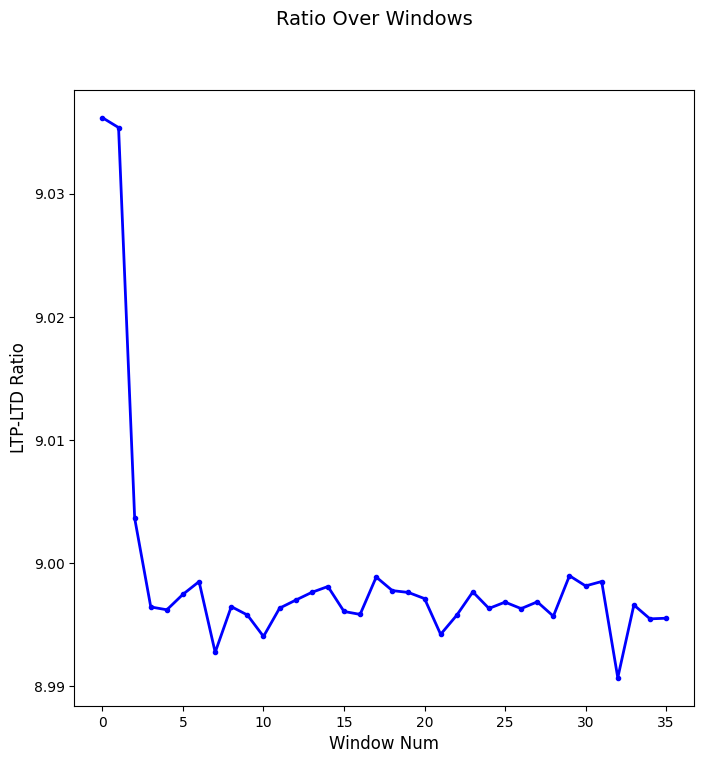

In [44]:
window_size = 30000
sorted_weights_ratios = order_weights_ratios_2(weights, ltp_events, ltd_events)

mean_sample_ratios, std_sample_ratios = get_ratios_over_windows(sorted_weights_ratios, window_size)

windows = np.arange(0, mean_sample_ratios.shape[0])

print(mean_sample_ratios)

fig = plt.figure()
fig.suptitle("Ratio Over Windows", fontsize=14)
fig.patch.set_facecolor('white')
ax = plt.subplot(111)
ax.set_xlabel('Window Num', fontsize=12)
ax.set_ylabel('LTP-LTD Ratio', fontsize=12)

plt.plot(windows, mean_sample_ratios, 'o', color='blue', label=f'WALK OVER P EVENTS FULL ID RATIOS', linestyle='solid', linewidth=2, markersize=3)
# plt.plot(windows, std_sample_ratios, 'o', color='blue', label=f'WALK OVER P EVENTS FULL ID RATIOS', linestyle='solid', linewidth=2, markersize=3)
# print(std_sample_ratios)



[9.00758556 9.00691937 9.00722227 9.00686142 9.0066691  9.00778951
 9.00887713 9.0048211  9.00677908 9.00858742 9.00897174 9.00513179
 9.00462461 9.00256711 9.0081519  9.00665894 9.00730914 9.01028045
 9.0081541  9.00651331 9.00740371 9.00962234 9.00640946 9.00818247
 9.00573909 9.00697798 9.00848206 9.00586822 9.00806742 9.00874449
 9.00719003 9.00822009 9.00746223 9.0076903  9.00772731 9.00772388]


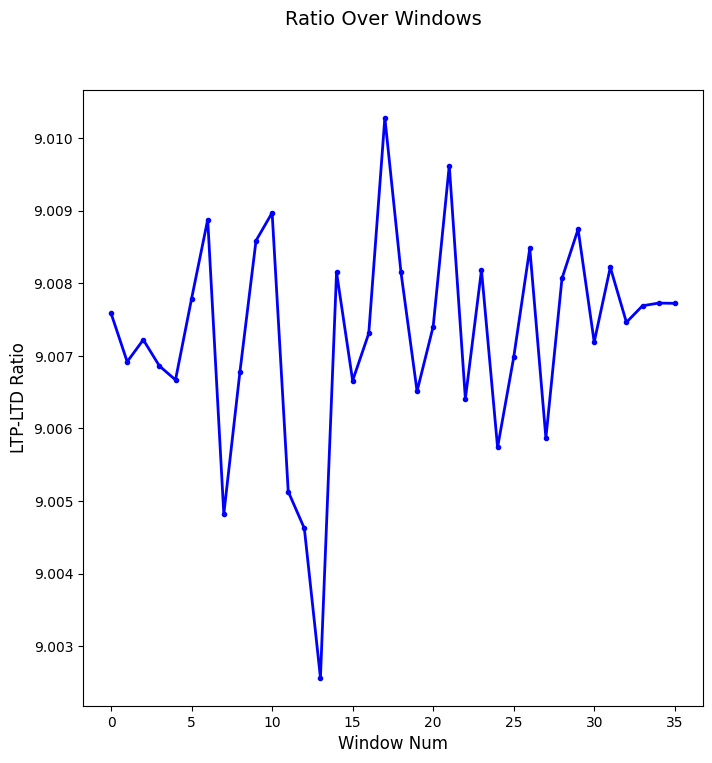

In [52]:

sorted_weights_ratios_2 = order_weights_ratios_2(weights, ltp_events_2, ltd_events_2)

mean_sample_ratios_2, std_sample_ratios_2 = get_ratios_over_windows(sorted_weights_ratios_2, window_size)

windows_2 = np.arange(0, mean_sample_ratios.shape[0])

print(mean_sample_ratios_2)

fig = plt.figure()
fig.suptitle("Ratio Over Windows", fontsize=14)
fig.patch.set_facecolor('white')
ax = plt.subplot(111)
ax.set_xlabel('Window Num', fontsize=12)
ax.set_ylabel('LTP-LTD Ratio', fontsize=12)

plt.plot(windows_2, mean_sample_ratios_2, 'o', color='blue', label=f'WALK OVER P EVENTS FULL ID RATIOS', linestyle='solid', linewidth=2, markersize=3)
# plt.plot(windows, std_sample_ratios, 'o', color='blue', label=f'WALK OVER P EVENTS FULL ID RATIOS', linestyle='solid', linewidth=2, markersize=3)
# print(std_sample_ratios)
